Insurance Charges Prediction
----------------------------



The dataset consists of different personality data to calculate their insurance charges. Here is we have to predict a numerical value of insurance charges. So we should use Regression model to predict the charges. There are different EDA tools from Seaborn and Matplot to visualize how data spred over the dataset and how they are depend on predicted values.


**Source** : Kaggle

**Size**  : 1000000 Rows

**Columns** : 12

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/insurance_dataset.csv')
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,NaN,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,NaN,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


In [ ]:
df.head() #provides first 5 row values

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [ ]:
df.tail() #provides last 5 row values

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
999995,59,male,46.67,2,no,northeast,High blood pressure,NaN,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,NaN,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728
999999,41,male,30.02,2,yes,northeast,Diabetes,Heart disease,Occasionally,Blue collar,Standard,23429.725030


In [ ]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')

In [ ]:
df=df.drop_duplicates()
df.shape

(1000000, 12)

In [ ]:
print('age',df.age.unique())
print('gender',df.gender.unique())
print('bmi',df.bmi.unique())
print('children',df.children.unique())
print('smoker',df.smoker.unique())
print('region',df.region.unique())
print('medical_history',df.medical_history.unique())
print('occupation',df.occupation.unique())
print('coverage_level',df.coverage_level.unique())
print('exercise_frequency',df.exercise_frequency.unique())
print('family_medical_history',df.family_medical_history.unique())

age [46 25 38 49 55 64 53 40 22 21 45 56 24 36 32 30 65 35 60 26 43 33 44 19
 41 42 61 23 31 20 62 59 57 29 34 27 47 50 37 52 63 28 54 51 58 48 39 18]
gender ['male' 'female']
bmi [21.45 25.38 44.88 ... 34.62 46.87 34.2 ]
children [5 2 0 3 4 1]
smoker ['yes' 'no']
region ['southeast' 'northwest' 'southwest' 'northeast']
medical_history ['Diabetes' nan 'High blood pressure' 'Heart disease']
occupation ['Blue collar' 'White collar' 'Student' 'Unemployed']
coverage_level ['Premium' 'Standard' 'Basic']
exercise_frequency ['Never' 'Occasionally' 'Rarely' 'Frequently']
family_medical_history [nan 'High blood pressure' 'Diabetes' 'Heart disease']


In [ ]:
df.isna().sum() # here find the missing values. In this dataset, missing values in medical history and family medical histoy

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

In [ ]:
i=df["medical_history"].mode()[0] #here we should fill the missing values; object column values with mode
df["medical_history"].fillna(i,inplace=True)
k=df["family_medical_history"].mode()[0]
df['family_medical_history'].fillna(k,inplace=True)

In [ ]:
df.isna().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         1000000 non-null  object 
 7   family_medical_history  1000000 non-null  object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [ ]:
df.dtypes #used to display datatypes of each columns

age                         int64
gender                     object
bmi                       float64
children                    int64
smoker                     object
region                     object
medical_history            object
family_medical_history     object
exercise_frequency         object
occupation                 object
coverage_level             object
charges                   float64
dtype: object

Data Visualization
------------------

In [ ]:
sex=df['gender'].value_counts()

Text(0, 0.5, 'Count')

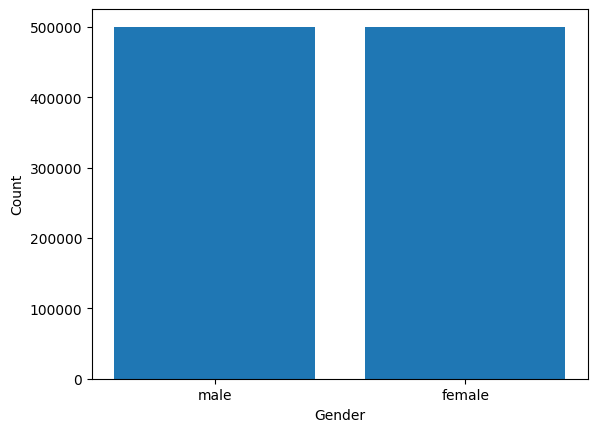

In [ ]:
plt.bar(sex.index, sex.values)
plt.xlabel('Gender')
plt.ylabel('Count')

In [ ]:
loc=df['region'].value_counts()
loc

region
northeast    250343
southwest    250095
northwest    249931
southeast    249631
Name: count, dtype: int64

Text(0, 0.5, 'Count')

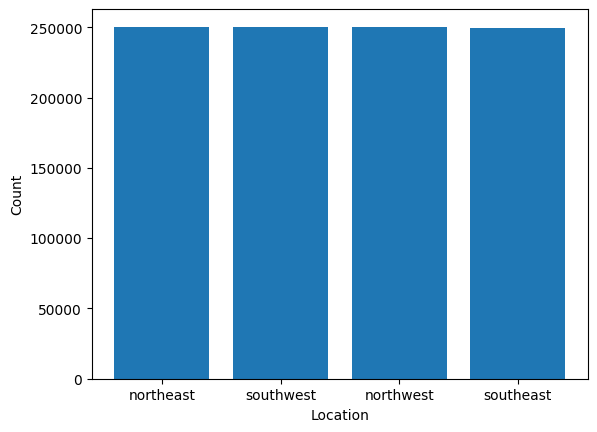

In [ ]:
plt.bar(loc.index, loc.values)
plt.xlabel('Location')
plt.ylabel('Count')

In [ ]:
history=df['medical_history'].value_counts()

Text(0, 0.5, 'Count')

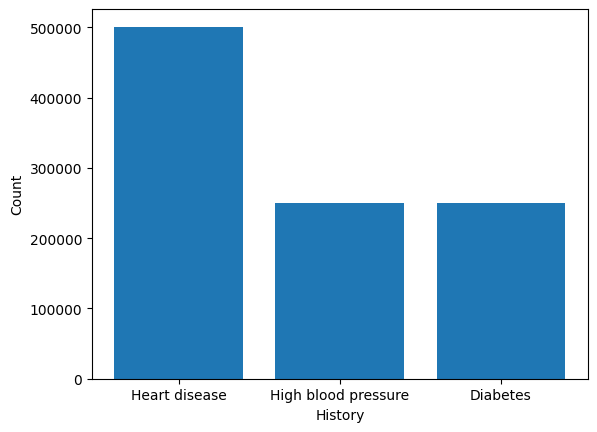

In [ ]:
plt.bar(history.index, history.values)
plt.xlabel('History')
plt.ylabel('Count')

In [ ]:
fam=df['family_medical_history'].value_counts()
fam

family_medical_history
Heart disease          500439
High blood pressure    249824
Diabetes               249737
Name: count, dtype: int64

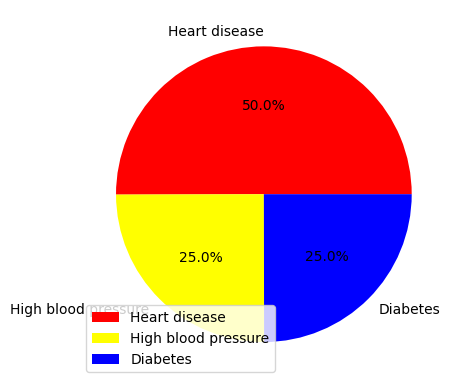

In [ ]:
y=[500439,249824,249737]
mylabel=["Heart disease","High blood pressure","Diabetes"]
my_color=["red","yellow","blue"]
plt.pie(y,labels=mylabel,colors=my_color,autopct="%1.1f%%")
plt.legend()

Text(0, 0.5, 'Count')

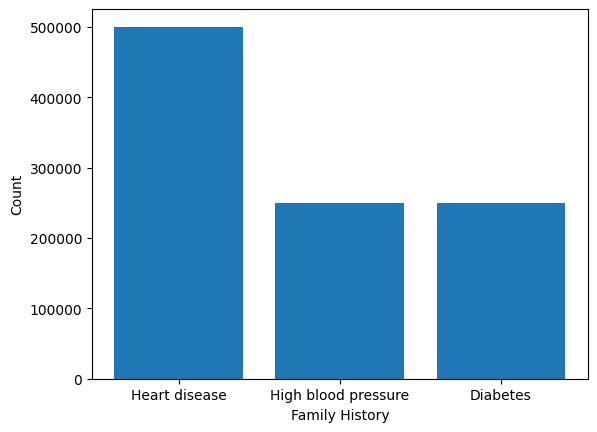

In [ ]:
plt.bar(fam.index, fam.values)
plt.xlabel('Family History')
plt.ylabel('Count')

In [ ]:
excer=df['exercise_frequency'].value_counts()

Text(0, 0.5, 'Count')

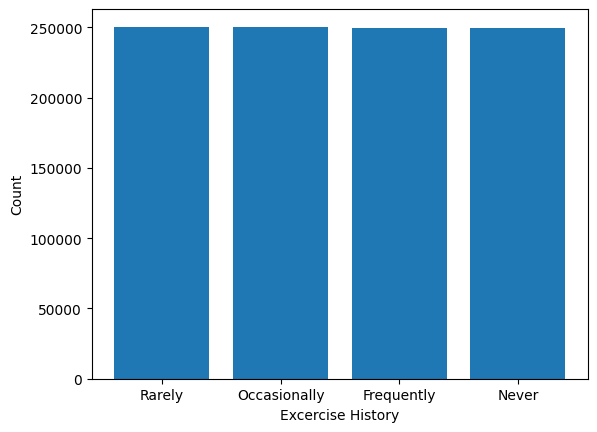

In [ ]:
plt.bar(excer.index, excer.values)
plt.xlabel('Excercise History')
plt.ylabel('Count')

In [ ]:
occup=df['occupation'].value_counts()

Text(0, 0.5, 'Count')

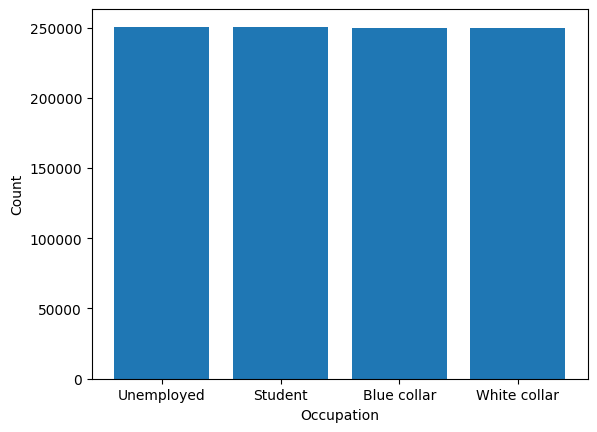

In [ ]:
plt.bar(occup.index, occup.values)
plt.xlabel('Occupation')
plt.ylabel('Count')

In [ ]:
cover=df['coverage_level'].value_counts()

Text(0, 0.5, 'Count')

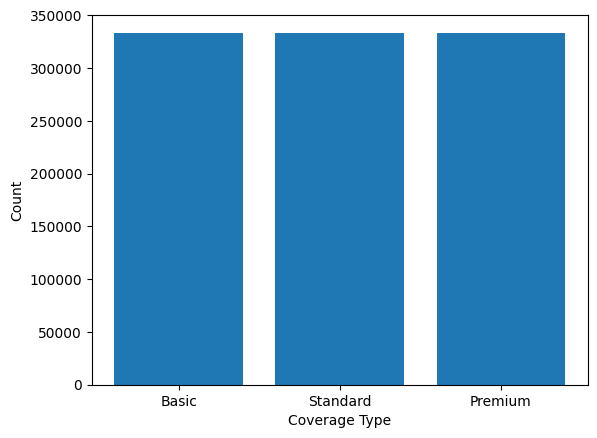

In [ ]:
plt.bar(cover.index, cover.values)
plt.xlabel('Coverage Type')
plt.ylabel('Count')

<Axes: xlabel='gender', ylabel='count'>

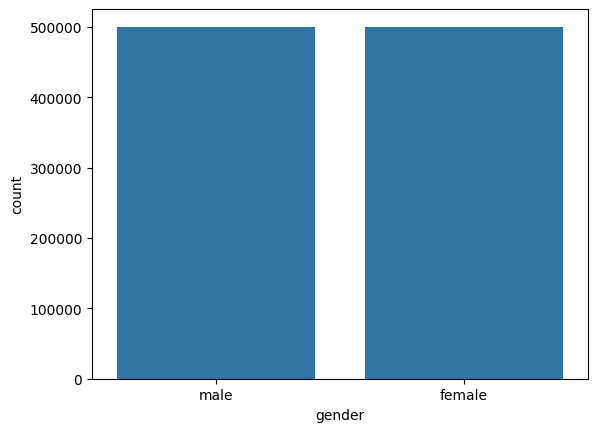

In [ ]:
sns.countplot(x='gender',data=df)

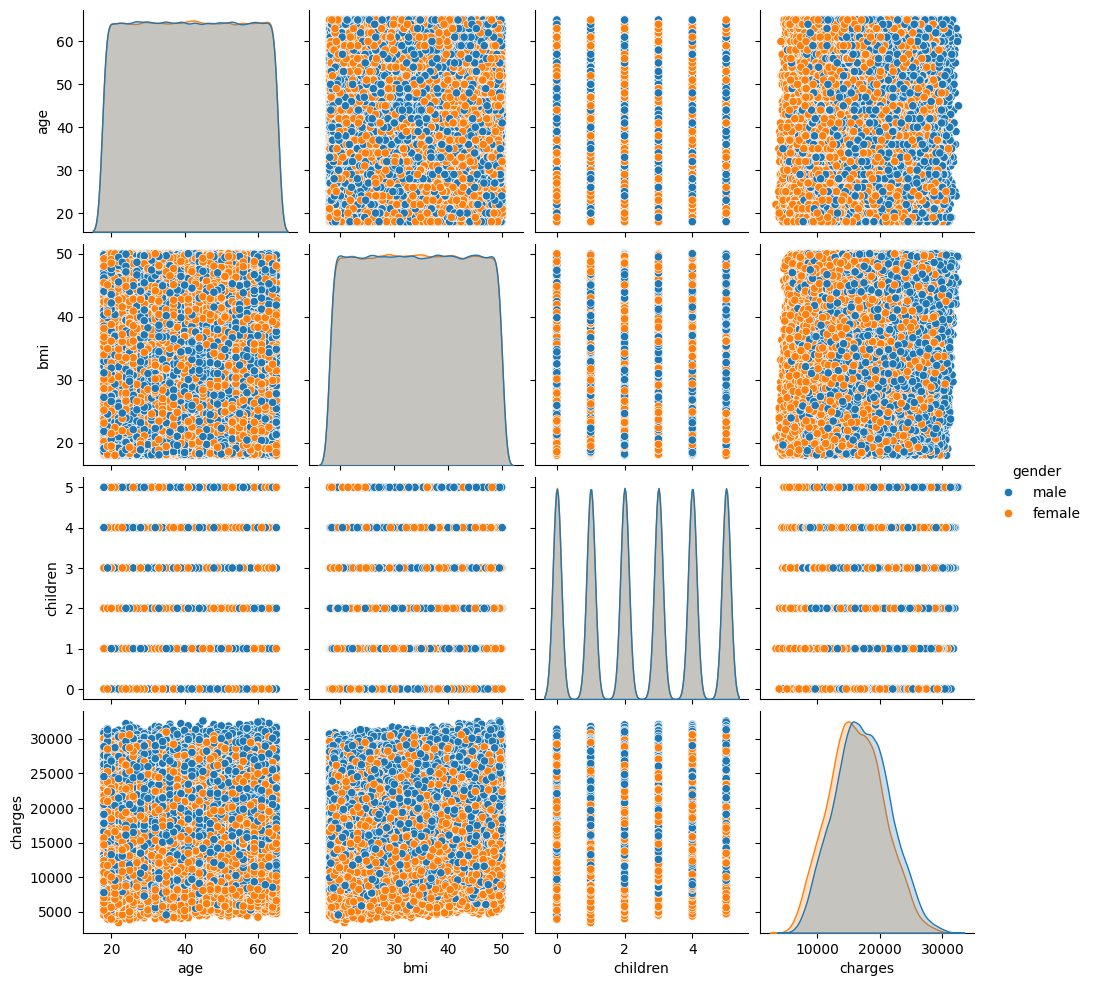

In [ ]:
sns.pairplot(df,hue='gender')

In [ ]:
df.dtypes

age                         int64
gender                     object
bmi                       float64
children                    int64
smoker                     object
region                     object
medical_history            object
family_medical_history     object
exercise_frequency         object
occupation                 object
coverage_level             object
charges                   float64
dtype: object

In [ ]:
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,Heart disease,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,Heart disease,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,Heart disease,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,Heart disease,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,Heart disease,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['smoker']=lb.fit_transform(df['smoker'])
df['gender']=lb.fit_transform(df['gender'])
df['region']=lb.fit_transform(df['region'])
df['exercise_frequency']=lb.fit_transform(df['exercise_frequency'])
df['occupation']=lb.fit_transform(df['occupation'])
df['medical_history']=lb.fit_transform(df['medical_history'])
df['family_medical_history']=lb.fit_transform(df['family_medical_history'])
df['coverage_level']=lb.fit_transform(df['coverage_level'])

In [ ]:
x=df.iloc[:,:-1]
x

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level
0,46,1,21.45,5,1,2,0,1,1,0,1
1,25,0,25.38,2,1,1,0,2,2,3,1
2,38,1,44.88,2,1,3,1,2,2,0,1
3,25,1,19.89,0,0,1,1,0,3,3,2
4,49,1,38.21,3,1,1,0,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...
999995,59,1,46.67,2,0,0,2,1,0,1,0
999996,33,1,36.83,2,0,0,1,2,0,2,0
999997,39,1,39.84,0,1,0,1,2,3,0,2
999998,37,0,45.06,4,1,0,2,0,2,2,1


In [ ]:
y=df.iloc[:,-1]
y

0         20460.307669
1         20390.899218
2         20204.476302
3         11789.029843
4         19268.309838
              ...     
999995    11584.134900
999996     9834.871456
999997    22076.632856
999998    20297.618728
999999    23429.725030
Name: charges, Length: 1000000, dtype: float64

<Axes: xlabel='age', ylabel='charges'>

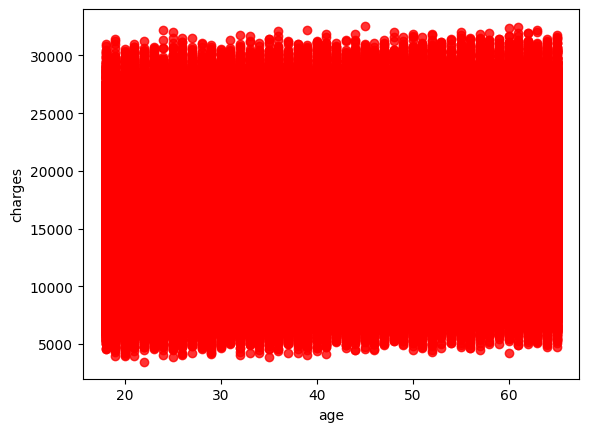

In [ ]:
sns.regplot(x=df['age'],y=y,color="r")

<Axes: xlabel='bmi', ylabel='charges'>

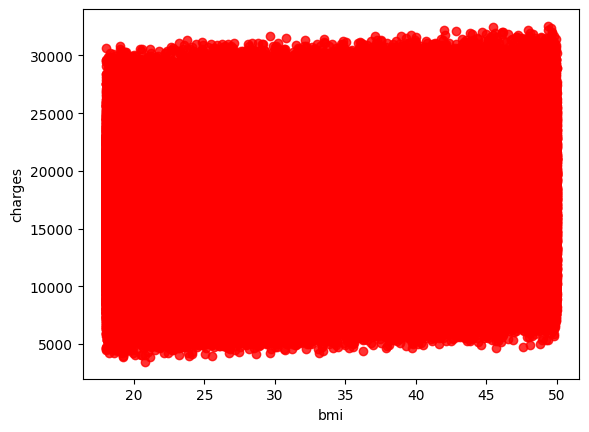

In [ ]:
sns.regplot(x=df['bmi'],y=y,color="r")

<Axes: xlabel='children', ylabel='charges'>

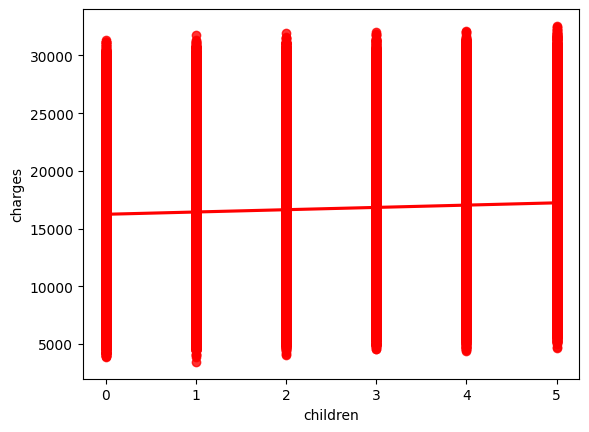

In [ ]:
sns.regplot(x=df['children'],y=y,color="r")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
df.corr()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
age,1.000000,-0.001066,0.001428,-0.001317,0.000825,0.001185,0.000384,0.000567,-0.000460,-0.000453,-0.000005,0.063390
gender,-0.001066,1.000000,-0.001040,0.000676,0.000024,-0.000691,0.001714,-0.000001,-0.000212,0.000792,0.000535,0.113526
bmi,0.001428,-0.001040,1.000000,-0.001635,-0.000225,0.001107,0.000981,-0.000612,0.000706,-0.000575,-0.000471,0.104429
children,-0.001317,0.000676,-0.001635,1.000000,0.000115,0.000457,-0.000013,-0.000290,0.000400,-0.000200,0.000604,0.076801
smoker,0.000825,0.000024,-0.000225,0.000115,1.000000,0.000659,-0.002521,-0.000021,-0.001584,-0.000131,0.001179,0.566213
region,0.001185,-0.000691,0.001107,0.000457,0.000659,1.000000,0.000082,0.000395,-0.000035,0.000551,-0.001171,-0.055433
medical_history,0.000384,0.001714,0.000981,-0.000013,-0.002521,0.000082,1.000000,-0.000150,-0.001090,-0.000449,-0.001350,-0.081923
family_medical_history,0.000567,-0.000001,-0.000612,-0.000290,-0.000021,0.000395,-0.000150,1.000000,0.001139,-0.001748,-0.001488,-0.080455
exercise_frequency,-0.000460,-0.000212,0.000706,0.000400,-0.001584,-0.000035,-0.001090,0.001139,1.000000,-0.000192,-0.001017,-0.089342
occupation,-0.000453,0.000792,-0.000575,-0.000200,-0.000131,0.000551,-0.000449,-0.001748,-0.000192,1.000000,-0.000909,0.025320


In [ ]:
corr=df.corr()
corr['charges'].sort_values(ascending=False)

charges                   1.000000
smoker                    0.566213
coverage_level            0.186725
gender                    0.113526
bmi                       0.104429
children                  0.076801
age                       0.063390
occupation                0.025320
region                   -0.055433
family_medical_history   -0.080455
medical_history          -0.081923
exercise_frequency       -0.089342
Name: charges, dtype: float64

In [ ]:
df.drop(['region','exercise_frequency','family_medical_history','medical_history'],axis=1,inplace=True)

<Axes: >

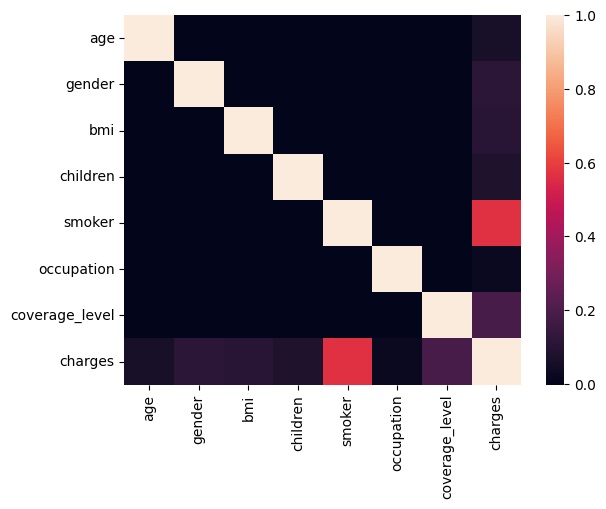

In [ ]:
sns.heatmap(df.corr())

Outlier Detection
-----------------

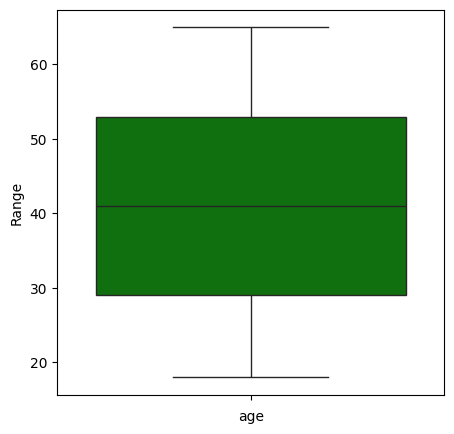

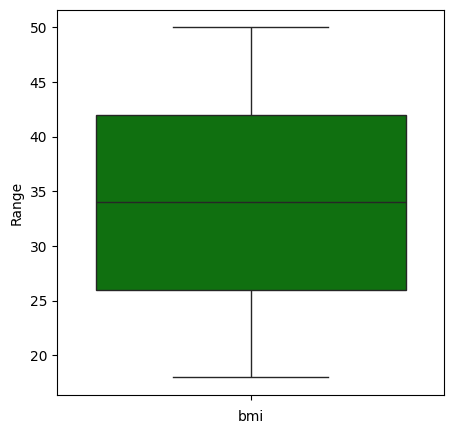

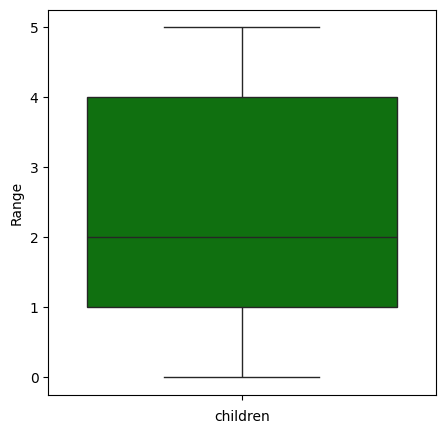

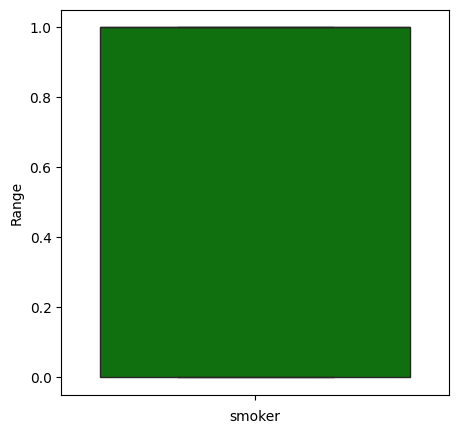

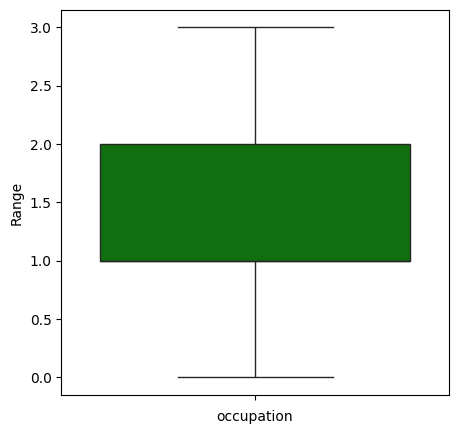

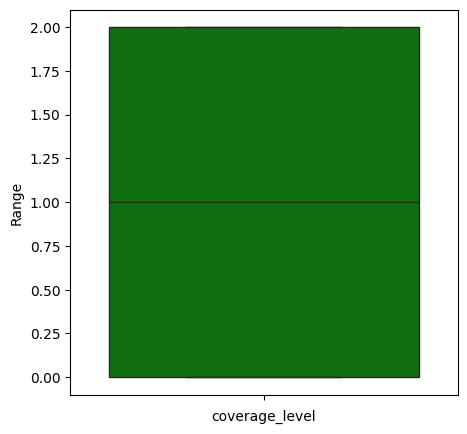

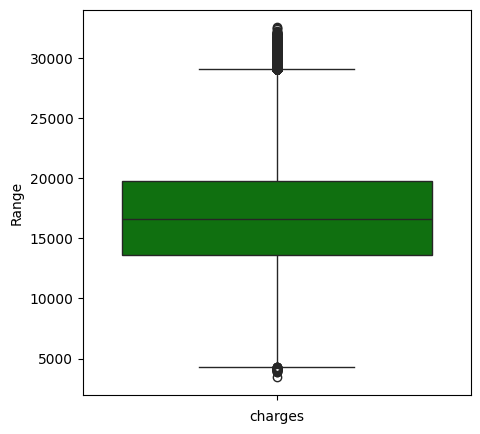

In [ ]:
for i in['age','bmi','children','smoker','occupation','coverage_level','charges']:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i],color='g')
    plt.xlabel(i)
    plt.ylabel('Range')

In [ ]:
# Define the iqr_method function
def iqr_method(df, charges):
    # Calculate the IQR
    Q1 = df[charges].quantile(0.25)
    Q3 = df[charges].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

In [ ]:
lst=['age','bmi','children','smoker','occupation','coverage_level','charges']
for i in lst:
    print(i)
    lower,upper=iqr_method(df,i)
    print('Lower Limit=',lower)
    print('Upper Limit=',upper)
    df[i]=np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))

age
Lower Limit= -7.0
Upper Limit= 89.0
bmi
Lower Limit= 2.064999999999994
Upper Limit= 65.94500000000001
children
Lower Limit= -3.5
Upper Limit= 8.5
smoker
Lower Limit= -1.5
Upper Limit= 2.5
occupation
Lower Limit= -0.5
Upper Limit= 3.5
coverage_level
Lower Limit= -3.0
Upper Limit= 5.0
charges
Lower Limit= 4328.732831619773
Upper Limit= 29053.104957406984


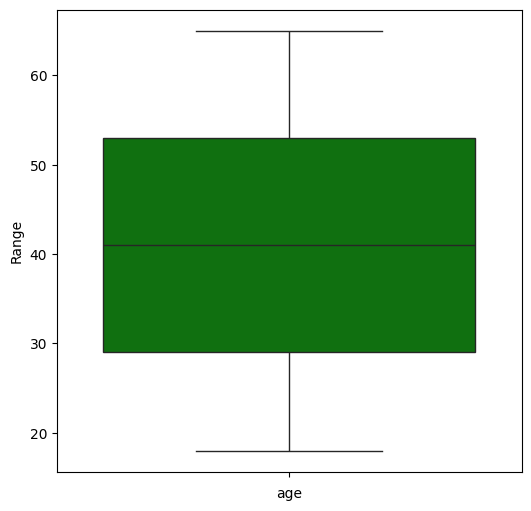

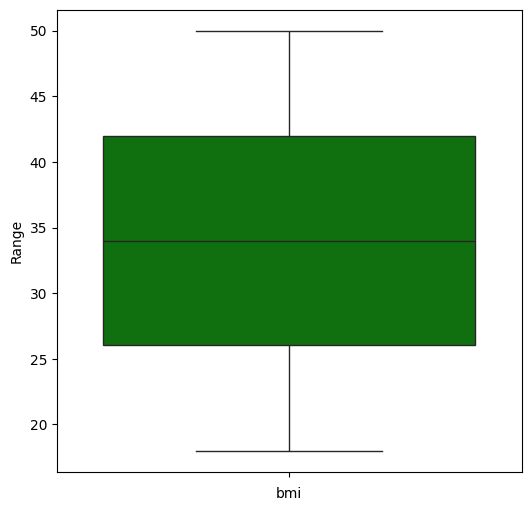

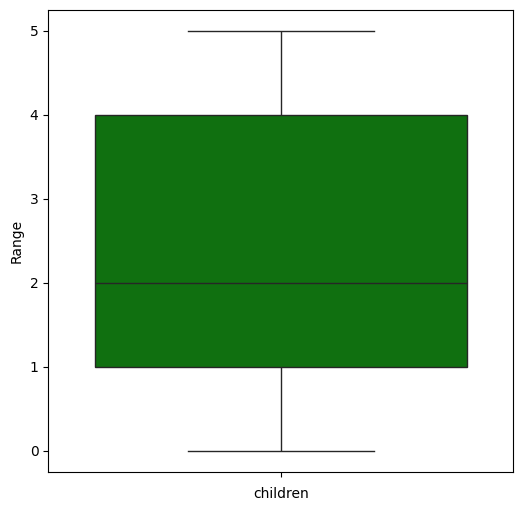

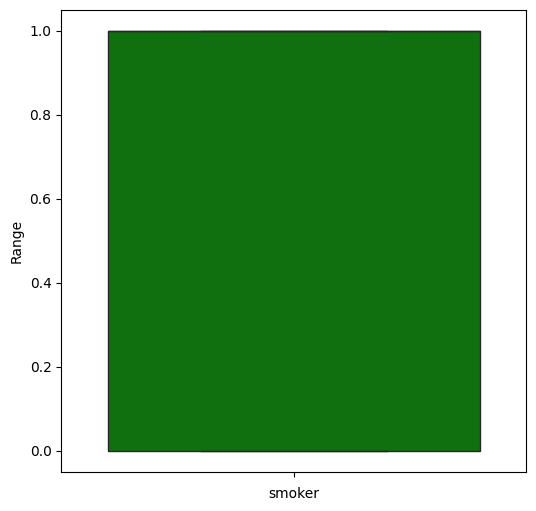

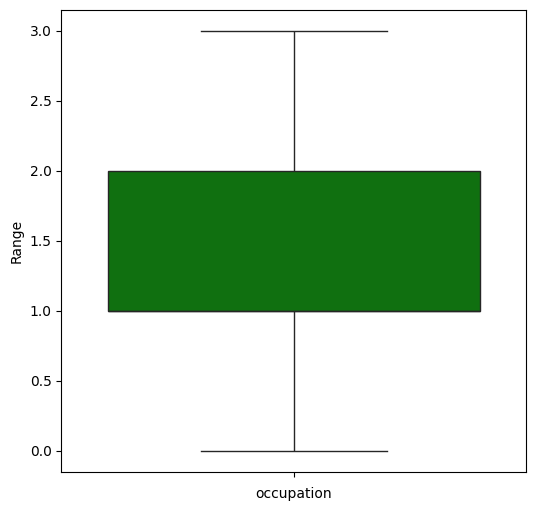

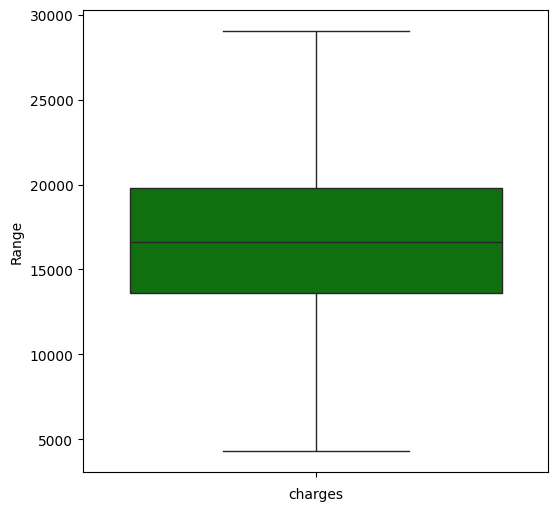

In [ ]:
for i in['age','bmi','children','smoker','occupation','charges']:
    plt.figure(figsize=(6,6))
    sns.boxplot(df[i],color='g')
    plt.xlabel(i)
    plt.ylabel('Range')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
model=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=7)
r_forest=RandomForestRegressor(max_depth=15,random_state=42)
#svr=SVR(kernel='rbf')
Lst=[model,knn,r_forest]

In [ ]:
for i in Lst:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print("Model is",i)
    print("MAE is",mean_absolute_error(y_test,y_pred))
    data=mean_absolute_percentage_error(y_test,y_pred)
    print("Percentage is",data)
    print("Squared Error is",mean_squared_error(y_test,y_pred))
    print("R2 Score is",r2_score(y_test,y_pred))
    print()

Model is LinearRegression()
MAE is 2754.6427127635193
Percentage is 0.18076225687655031
Squared Error is 11430474.036438074
R2 Score is 0.4135815168053487

Model is KNeighborsRegressor(n_neighbors=7)
MAE is 2658.1701776872005
Percentage is 0.1795051229456874
Squared Error is 10840181.295335058
R2 Score is 0.4438653504219563

Model is RandomForestRegressor(max_depth=15, random_state=42)
MAE is 2028.7996762641872
Percentage is 0.13166005168475534
Squared Error is 6547642.6236341745
R2 Score is 0.6640857900020478



In [ ]:
df2=pd.DataFrame({"Actual_value":y_test,"Predicted_value":y_pred,"Difference":y_test-y_pred})
df2

,Actual_value,Predicted_value,Difference
276826,12481.068956,12222.007654,259.061302
849425,18299.071994,16577.902383,1721.169611
504499,18846.795608,18550.114507,296.681101
601054,21597.663069,21805.299712,-207.636643
980221,25596.721389,19935.711543,5661.009846
...,...,...,...
634722,14720.961082,12328.880739,2392.080343
71705,16244.147617,15834.220487,409.927130
290316,10446.878648,13249.789444,-2802.910797
417736,12840.908188,15358.685480,-2517.777292


Boosting
--------

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rbr=GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
rbr.fit(x_train,y_train)
y_pred1=rbr.predict(x_test)
r2scores=r2_score(y_test,y_pred1)
print(r2scores)

0.6736229675367138
